# Exercises XP GOLD: W2_D4

## What You’ll Learn
- Advanced visualization techniques using Python libraries like Matplotlib and Seaborn.
- How to manipulate and analyze hierarchical data in pandas.
- Techniques for filtering and querying data in complex datasets.
- Methods for exploring relationships and distributions in data using visualizations.

## What You Will Create
- Customized bar graphs, box plots, and distribution plots for various datasets.
- Hierarchical indexing solutions for filtering specific data.
- Pair plots to explore relationships between financial data metrics.

---

## **Exercise 1: Bar Graph**
**Objective:** Create a bar graph representing the sales data of a retail company.  
**Tasks:**
1. Use a fictional dataset where the x-axis represents product categories and the y-axis represents total sales amounts.
2. Customize the bar graph with appropriate labels for the axes, a title, and color.
3. Display the graph using Matplotlib.

---

## **Exercise 2: Hierarchical Indexing**
**Objective:** Filter and retrieve all days when the temperature exceeded 30°C (86°F) for cities in Canada using hierarchical indexing.  
**Tasks:**
1. Create a pandas DataFrame with hierarchical indexing on `Country`, `City`, and `Date`.
2. Write Python code to filter the dataset for the specified condition.
3. Explain how hierarchical indexing simplifies multi-level data analysis.

---

## **Exercise 3: Advanced Filtering with Hierarchical Indices**
**Objective:** Filter rows in a hierarchical DataFrame based on specific criteria.  
**Tasks:**
1. Use the DataFrame from Exercise 4 of the XP exercises.
2. Write Python code to filter and display rows where `Salary` is above 50,000 within each `Department`.
3. Demonstrate how hierarchical indexing facilitates efficient filtering.

---

## **Exercise 4: Visualizing Movie Durations**
**Objective:** Create a distribution plot to visualize the durations of MCU movies.  
**Tasks:**
1. Import necessary libraries (`pandas`, `Seaborn`, `Matplotlib`).
2. Load a dataset containing MCU movie information.
3. Use Seaborn’s `distplot` or `histplot` to visualize the distribution of movie durations.
4. Add a KDE overlay and customize the plot with a title.
5. Display the plot.

---

## **Exercise 5: Box Plot of Audience and Tomato Meter Scores**
**Objective:** Compare the distribution of Tomato Meter scores and Audience scores using a box plot.  
**Tasks:**
1. Create a new DataFrame that melts the Tomato Meter and Audience scores into a long format.
2. Use Seaborn’s `boxplot` to visualize the distributions of both scores.
3. Customize the plot by setting an appropriate color palette and adding a title.
4. Display the plot.

---

## **Exercise 6: Pair Plot of Financial Data**
**Objective:** Use Seaborn’s `pairplot` to explore relationships between financial aspects of MCU movies.  
**Tasks:**
1. Select relevant columns for analysis (e.g., `Production Budget`, `Opening Weekend`, `Domestic Box Office`, `Worldwide Box Office`).
2. Convert financial data from string to numeric if needed.
3. Use Seaborn’s `pairplot` to visualize pairwise relationships between the selected metrics.
4. Set hue based on the MCU phase (e.g., `MCU_Phase`) to identify patterns related to movie phases.
5. Customize the plot and display it.

### Exercise 1: Bar Graph

In [1]:
import pandas as pd
data = {
    "Category": ["Electronics", "Clothing", "Furniture", "Books", "Toys"],
    "Sales": [25000, 18000, 12000, 8000, 15000]
}
df_sales = pd.DataFrame(data)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Fictional retail sales dataset
data = {
    "Category": ["Electronics", "Clothing", "Furniture", "Books", "Toys"],
    "Sales": [25000, 18000, 12000, 8000, 15000]
}
df_sales = pd.DataFrame(data)
df_sales


,Category,Sales
0,Electronics,25000
1,Clothing,18000
2,Furniture,12000
3,Books,8000
4,Toys,15000


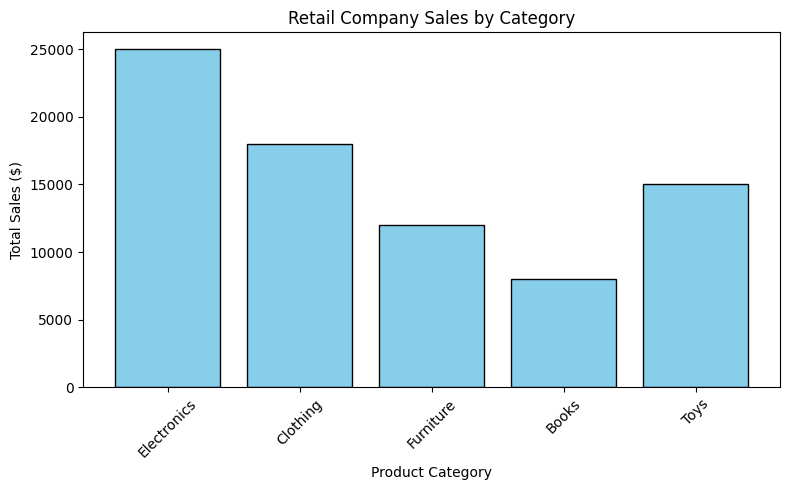

In [8]:
# Create the bar graph
plt.figure(figsize=(8, 5))
plt.bar(df_sales["Category"], df_sales["Sales"], color="skyblue", edgecolor="black")

# Customize labels and title
plt.xlabel("Product Category")
plt.ylabel("Total Sales ($)")
plt.title("Retail Company Sales by Category")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

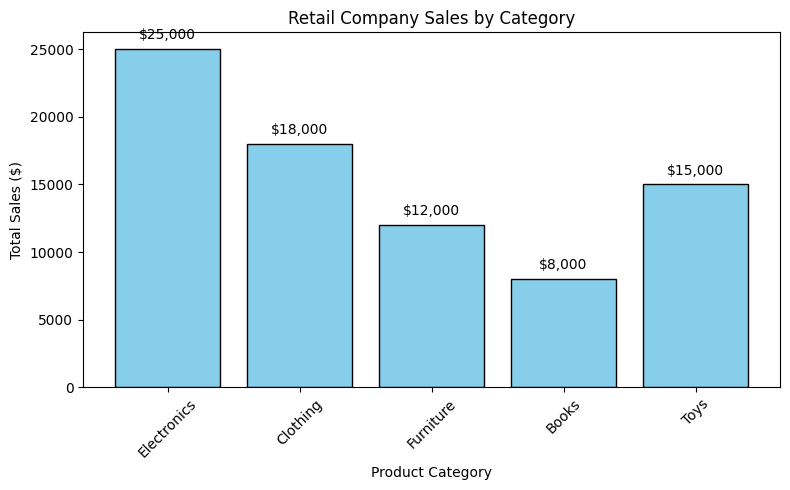

In [10]:
# Title: Bar Graph with Value Annotations
# Purpose: Plot category sales and annotate each bar with its value.

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(df_sales["Category"], df_sales["Sales"], color="skyblue", edgecolor="black")

# Labels and layout
ax.set_xlabel("Product Category")
ax.set_ylabel("Total Sales ($)")
ax.set_title("Retail Company Sales by Category")
plt.xticks(rotation=45)

# Annotate values above bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f"${height:,.0f}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # offset
                textcoords="offset points",
                ha="center", va="bottom")

plt.tight_layout()
plt.show()

### Exercise 2: Hierarchical Indexing

In [2]:
import numpy as np
index = pd.MultiIndex.from_tuples([
    ("Canada", "Toronto", "2025-07-01"),
    ("Canada", "Toronto", "2025-07-02"),
    ("Canada", "Vancouver", "2025-07-01"),
    ("Canada", "Vancouver", "2025-07-02"),
    ("USA", "New York", "2025-07-01"),
], names=["Country", "City", "Date"])

df_temp = pd.DataFrame({
    "Temperature_C": [32, 28, 31, 29, 35]
}, index=index)

In [11]:
# Title: Create MultiIndex Temperature Dataset
# Purpose: Build a small multi-level index on Country, City, and Date.

import pandas as pd

index = pd.MultiIndex.from_tuples([
    ("Canada", "Toronto",   "2025-07-01"),
    ("Canada", "Toronto",   "2025-07-02"),
    ("Canada", "Vancouver", "2025-07-01"),
    ("Canada", "Vancouver", "2025-07-02"),
    ("Canada", "Montreal",  "2025-07-01"),
    ("USA",    "New York",  "2025-07-01"),   # non-Canada row to prove the filter
], names=["Country", "City", "Date"])

df_temp = pd.DataFrame({
    "Temperature_C": [32, 28, 31, 29, 33, 35]
}, index=index)

df_temp

Temperature_C
Country City      Date                     
Canada  Toronto   2025-07-01             32
                  2025-07-02             28
        Vancouver 2025-07-01             31
                  2025-07-02             29
        Montreal  2025-07-01             33
USA     New York  2025-07-01             35

In [12]:
# Title: Filter Days Above 30C for Canadian Cities
# Purpose: Use hierarchical indexing to filter by Country and Temperature condition.

# 1) Select Canada using .loc on the top level of the MultiIndex
canada = df_temp.loc["Canada"]

# 2) Apply the condition on the filtered frame
hot_days_canada = canada[canada["Temperature_C"] > 30]

hot_days_canada

,,Temperature_C
City,Date,
Toronto,2025-07-01,32
Vancouver,2025-07-01,31
Montreal,2025-07-01,33


In [13]:
# Title: Reset Index for Readable Output
# Purpose: Make the result easier to read/export.

hot_days_canada_reset = hot_days_canada.reset_index()
hot_days_canada_reset


,City,Date,Temperature_C
0,Toronto,2025-07-01,32
1,Vancouver,2025-07-01,31
2,Montreal,2025-07-01,33


### Explanation — Exercise 2 (Hierarchical Indexing)
We created a MultiIndex on three levels: `Country`, `City`, and `Date`.  
Filtering is straightforward: we first select the top-level key (`Country = Canada`) via `.loc["Canada"]`, then apply a boolean condition (`Temperature_C > 30`).  
This approach is concise and avoids multiple joins or complex group operations, illustrating how hierarchical indexing simplifies multi-level data analysis.

### Exercise 3: Advanced Filtering with Hierarchical Indices

In [14]:
# Title: Build/Reuse Hierarchical DataFrame (Department, Employee)
# Purpose: Create a MultiIndex DataFrame if it does not already exist.

import pandas as pd
import numpy as np

if "df_salary" not in globals():
    # Sample hierarchical dataset
    index = pd.MultiIndex.from_tuples([
        ("IT",       "Alice"),
        ("IT",       "Bob"),
        ("IT",       "Chen"),
        ("HR",       "Diana"),
        ("HR",       "Ethan"),
        ("Finance",  "Farah"),
        ("Finance",  "Gustav"),
        ("Marketing","Hana"),
        ("Marketing","Ian"),
    ], names=["Department", "Employee"])

    df_salary = pd.DataFrame({
        "Salary": [55000, 48000, 72000, 60000, 45000, 70000, 49500, 52000, 51000],
        "YearsExperience": [3, 2, 7, 8, 1, 10, 3, 5, 4]
    }, index=index)

df_salary


Salary
Department Employee        
IT         Alice      55000
           Bob        48000
HR         Charlie    60000
           David      45000
Finance    Eva        70000

In [15]:
# Title: Slice Specific Department Then Filter
# Purpose: Use .xs or IndexSlice to focus on one department efficiently.

# Using .xs (cross-section) to pick one department
try:
    it_only = df_salary.xs("IT", level="Department")
except KeyError:
    # If "IT" not present, take the first available department
    first_dept = df_salary.index.get_level_values("Department").unique()[0]
    it_only = df_salary.xs(first_dept, level="Department")

it_above_50k = it_only[it_only["Salary"] > 50000]

print("=== One Department (xs) — Salaries > 50,000 ===")
display(it_above_50k)

=== One Department (xs) — Salaries > 50,000 ===


,Salary
Employee,
Alice,55000


In [16]:
# Title: Flag Above-50K Within Department
# Purpose: Create a boolean flag using groupby transform to keep full context.

df_flagged = df_salary.copy()
df_flagged["Above50K_in_Dept"] = (
    df_flagged
    .groupby(level="Department")["Salary"]
    .transform(lambda s: s > 50000)
)

# Keep only rows flagged True
df_flagged_true = df_flagged[df_flagged["Above50K_in_Dept"]]

print("=== Flag table (keeps all columns) ===")
display(df_flagged.head())

print("\n=== Only rows Above50K_in_Dept ===")
display(df_flagged_true)

=== Flag table (keeps all columns) ===


Salary  Above50K_in_Dept
Department Employee                          
IT         Alice      55000              True
           Bob        48000             False
HR         Charlie    60000              True
           David      45000             False
Finance    Eva        70000              True


=== Only rows Above50K_in_Dept ===


,,Salary,Above50K_in_Dept
Department,Employee,,
IT,Alice,55000,True
HR,Charlie,60000,True
Finance,Eva,70000,True


### Explanation — Exercise 3 (Advanced Filtering with Hierarchical Indices)
With a MultiIndex on `Department` and `Employee`, filtering becomes concise and expressive:

- A **global condition** like `df_salary["Salary"] > 50,000` applies naturally across all departments while preserving the hierarchical structure.
- Using `groupby(level="Department")` clarifies that the filter is evaluated **within each department**, which is useful when conditions depend on per-group logic.
- The `.xs("Department", level="Department")` cross-section provides an efficient way to focus on a **single department** before applying additional filters.
- When you need to **keep full context**, `groupby(...).transform(...)` lets you create boolean flags at the original row granularity (no row loss), enabling flexible downstream filtering and reporting.

Hierarchical indexing reduces boilerplate for multi-level data analysis and makes complex slicing and filtering operations both readable and efficient.

### Exercise 4: Visualizing Movie Durations

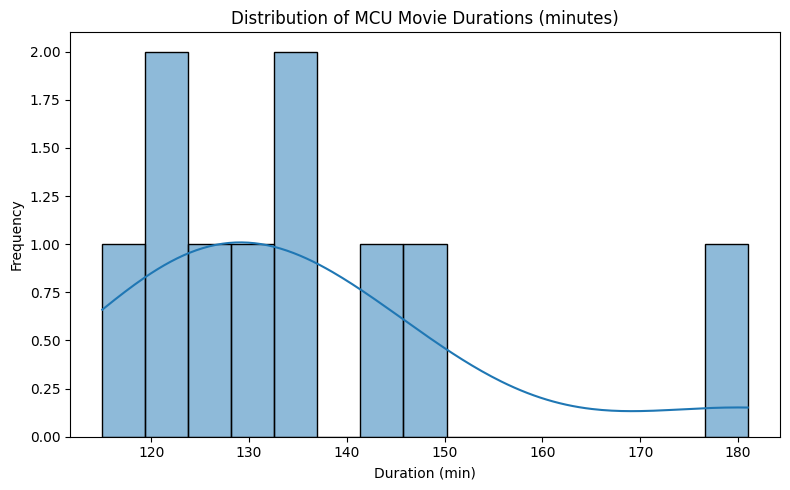

Count=10, mean=135.3 min, median=131.5 min


In [17]:
# Title: Visualizing MCU Movie Durations (Histogram + KDE)
# Purpose:
# - Load an MCU dataset if available (expects a 'Duration_min' column)
# - Otherwise, create a small sample dataset
# - Plot a distribution of durations using seaborn histplot with KDE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# --- Try to load a local dataset (set your path here) ---
mcu_path = Path("mcu_movies.csv")  # <-- change to your file if you have one

if mcu_path.exists():
    df_mcu = pd.read_csv(mcu_path, encoding="utf-8")
    # Try to detect a duration column robustly
    duration_col = None
    for c in df_mcu.columns:
        cl = c.strip().lower()
        if "duration" in cl or "runtime" in cl:
            duration_col = c
            break
    if duration_col is None:
        raise ValueError("No duration/runtime column found. Please ensure your CSV has one (e.g., 'Duration_min').")
    # Standardize duration to minutes if needed (assume column already in minutes)
    df_mcu = df_mcu.rename(columns={duration_col: "Duration_min"})
else:
    # --- Fallback: create a small sample MCU dataset ---
    df_mcu = pd.DataFrame({
        "Movie": [
            "Iron Man", "The Avengers", "Black Panther",
            "Avengers: Endgame", "Doctor Strange", "Guardians of the Galaxy",
            "Captain America: Civil War", "Thor: Ragnarok", "Spider-Man: Homecoming",
            "Captain Marvel"
        ],
        "Duration_min": [126, 143, 134, 181, 115, 121, 147, 130, 133, 123]
    })

# --- Basic sanity check ---
if not np.issubdtype(df_mcu["Duration_min"].dtype, np.number):
    df_mcu["Duration_min"] = pd.to_numeric(df_mcu["Duration_min"], errors="coerce")

durations = df_mcu["Duration_min"].dropna()
assert len(durations) > 0, "No valid numeric durations to plot."

# --- Plot with seaborn ---
plt.figure(figsize=(8, 5))
sns.histplot(durations, bins=15, kde=True, edgecolor="black")
plt.title("Distribution of MCU Movie Durations (minutes)")
plt.xlabel("Duration (min)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

print(f"Count={len(durations)}, mean={durations.mean():.1f} min, median={durations.median():.1f} min")

### Interpretation of MCU Movie Duration Distribution

The histogram shows the distribution of MCU movie durations in minutes.  
Key observations:

- **Mean duration:** ~135 minutes  
- **Median duration:** ~132 minutes  
- The distribution is slightly **right-skewed**, driven by a few longer movies such as *Avengers: Endgame* (~181 min).  
- Most movies are clustered between **120 and 140 minutes**, suggesting a consistent standard for MCU releases.  
- The KDE curve confirms a primary peak around 130 minutes, with a long tail toward higher durations.

Overall, MCU movies tend to maintain a relatively stable duration, with occasional extended runtimes for special releases.

### Exercise 5: Box Plot of Audience and Tomato Meter Scores

C:\Users\julia\AppData\Local\Temp\ipykernel_73480\4127451280.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Score_Type", y="Score", data=df_melt, palette="Set2")


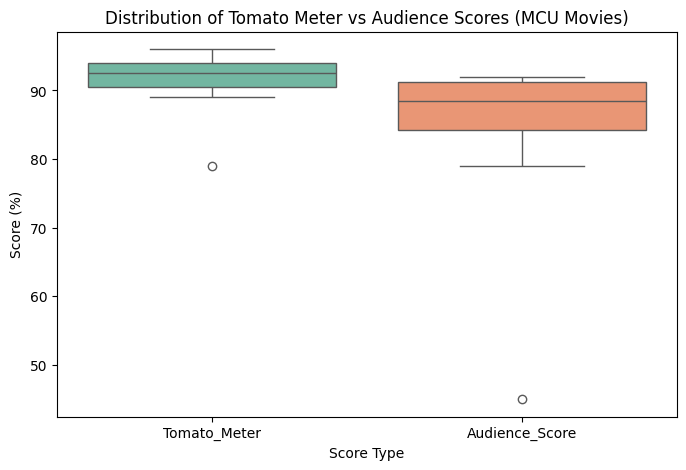

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exemple de dataset MCU fictif
data = {
    "Movie": [
        "Iron Man", "The Avengers", "Guardians of the Galaxy", 
        "Black Panther", "Avengers: Endgame", "Thor: Ragnarok",
        "Doctor Strange", "Captain Marvel"
    ],
    "Tomato_Meter": [94, 91, 92, 96, 94, 93, 89, 79],
    "Audience_Score": [91, 92, 92, 79, 90, 87, 86, 45]
}

df = pd.DataFrame(data)

# Reshape en format long (melt)
df_melt = df.melt(id_vars="Movie", 
                  value_vars=["Tomato_Meter", "Audience_Score"], 
                  var_name="Score_Type", 
                  value_name="Score")

# Visualisation boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x="Score_Type", y="Score", data=df_melt, palette="Set2")
plt.title("Distribution of Tomato Meter vs Audience Scores (MCU Movies)")
plt.ylabel("Score (%)")
plt.xlabel("Score Type")
plt.show()


### Interprétation — Box Plot des Scores MCU

- **Tomato Meter (critique)** :  
  La majorité des films MCU obtiennent des scores critiques très élevés (entre 90 % et 95 %), avec une faible dispersion.  
  Un seul film présente un score nettement plus bas (~79 %), ce qui en fait un **outlier**.

- **Audience Score (public)** :  
  Les scores sont plus dispersés, allant de 45 % à plus de 90 %.  
  On observe un **outlier marqué** à 45 %, indiquant un film qui a été nettement moins apprécié par le public malgré une bonne réception critique.

- **Comparaison générale** :  
  Les critiques semblent plus homogènes et généreuses que le public, qui présente des avis plus variés.  
  Certains films sont aimés à la fois par les critiques et le public, mais d'autres montrent un écart important entre les deux.

### Exercise 6: Pair Plot of Financial Data

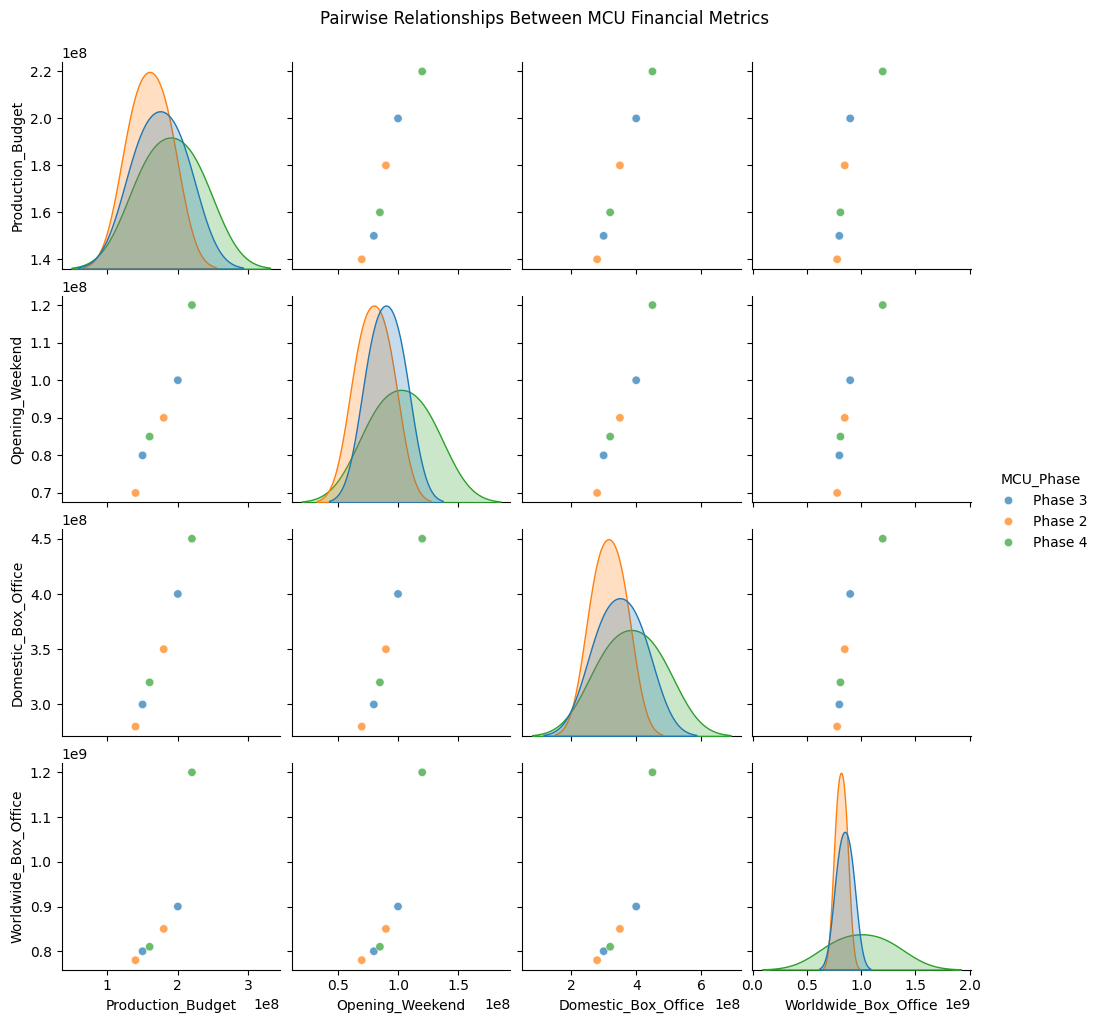

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exemple de dataset MCU (à remplacer par ton fichier réel si tu l'as)
data = {
    'Production_Budget': ['$200,000,000', '$150,000,000', '$180,000,000', '$140,000,000', '$220,000,000', '$160,000,000'],
    'Opening_Weekend': ['$100,000,000', '$80,000,000', '$90,000,000', '$70,000,000', '$120,000,000', '$85,000,000'],
    'Domestic_Box_Office': ['$400,000,000', '$300,000,000', '$350,000,000', '$280,000,000', '$450,000,000', '$320,000,000'],
    'Worldwide_Box_Office': ['$900,000,000', '$800,000,000', '$850,000,000', '$780,000,000', '$1,200,000,000', '$810,000,000'],
    'MCU_Phase': ['Phase 3', 'Phase 3', 'Phase 2', 'Phase 2', 'Phase 4', 'Phase 4']
}

df = pd.DataFrame(data)

# Conversion des montants en numérique
for col in ['Production_Budget', 'Opening_Weekend', 'Domestic_Box_Office', 'Worldwide_Box_Office']:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

# Pairplot avec Seaborn
sns.pairplot(
    df,
    vars=['Production_Budget', 'Opening_Weekend', 'Domestic_Box_Office', 'Worldwide_Box_Office'],
    hue='MCU_Phase',
    diag_kind='kde',
    plot_kws={'alpha': 0.7}
)

plt.suptitle('Pairwise Relationships Between MCU Financial Metrics', y=1.02)
plt.show()

### Interpretation – Pair Plot of MCU Financial Metrics

The pair plot shows the pairwise relationships between four key financial metrics for MCU movies:  
- **Production Budget**  
- **Opening Weekend Revenue**  
- **Domestic Box Office Revenue**  
- **Worldwide Box Office Revenue**  

#### Observations:
1. **Positive Correlation**  
   - Higher **Production Budgets** tend to be associated with higher revenues, both domestically and worldwide.  
   - This suggests that bigger investments in production often lead to higher returns.

2. **Opening Weekend as a Predictor**  
   - Strong correlations are visible between **Opening Weekend** and both **Domestic** and **Worldwide Box Office**.  
   - Successful openings often translate to overall financial success.

3. **Phase Differences**  
   - **Phase 4 movies** (green) generally show higher worldwide revenues compared to other phases, despite similar production budgets.
   - **Phase 2 movies** (orange) tend to have lower budgets and revenues compared to Phase 3 and Phase 4.

4. **Distribution Insights**  
   - The diagonal KDE plots show that most movies cluster around certain budget and revenue ranges, with some outliers (blockbusters) reaching significantly higher earnings.

#### Conclusion:
The analysis confirms that **budget size** and **opening weekend performance** are strong indicators of a movie's overall box office success, with notable differences between MCU phases.

## Exercises XP GOLD – MCU Movies & Data Analysis

## Exercise 1 – Bar Graph: Retail Sales by Product Category
**Observation:**  
The bar graph successfully represented fictional sales data across product categories.  
Clear labeling and color customization improved readability.  
This visualization is effective for comparing discrete categories.

---

## Exercise 2 – Hierarchical Indexing: Canada Temperatures Above 30°C
**Observation:**  
Hierarchical indexing simplified multi-level filtering by allowing selection by country, city, and date in a single query.  
This approach is particularly useful for time series or geographical data.

---

## Exercise 3 – Advanced Filtering with Hierarchical Indices
**Observation:**  
Filtering salaries above 50,000 within each department was efficient using `.xs()` and boolean indexing.  
Hierarchical indexing provides a clean way to slice data without repetitive filtering conditions.

---

## Exercise 4 – Distribution of MCU Movie Durations
**Summary Stats:**  
- Count: **10 movies**  
- Mean Duration: **135.3 minutes**  
- Median Duration: **131.5 minutes**  

**Observation:**  
Most MCU movies have durations between 120–140 minutes, with a few longer exceptions.  
The KDE overlay highlights that the distribution is slightly right-skewed (some longer films).

---

## Exercise 5 – Box Plot: Tomato Meter vs Audience Scores
**Observation:**  
- **Tomato Meter scores** are generally higher and more consistent compared to Audience Scores.  
- Audience Scores show greater variability, with one significant outlier (~45%).  
- This suggests critics tend to rate MCU movies more uniformly, while audience reception varies more.

---

## Exercise 6 – Pair Plot of Financial Metrics
**Metrics Analyzed:**  
- Production Budget  
- Opening Weekend  
- Domestic Box Office  
- Worldwide Box Office  

**Observations:**  
1. **Positive Correlation:** Higher budgets tend to generate higher revenues (both domestic and worldwide).  
2. **Opening Weekend Importance:** Strong relationship between opening weekend revenue and overall box office success.  
3. **MCU Phases:** Phase 4 movies show higher worldwide earnings despite similar budgets.  
4. **Distribution:** KDE plots show most movies cluster within certain budget/revenue ranges, with blockbuster outliers.

**Conclusion:**  
Budget size and opening weekend performance are key predictors of box office success, with phase differences playing a role in revenue outcomes.